## Configure FACTS run

In [1]:
# Configure directories and experiment

factsdir = '/opt/facts' # FACTS root directory
exp_name = 'jupyter01' # desired experiment name

experiment_config = """
global-options:
    nsamps: 200
    scenario: ssp245
    pyear_start: 2020
    pyear_end: 2150
    pyear_step: 10
    baseyear: 2005
    pipeline_file: 'pipeline.global.yml'

climate_step:
    temperature:
        module_set: "fair"
        module: "temperature"
        generates_climate_output: true

sealevel_step:
    GrIS1f:
        module_set: "FittedISMIP"
        module: "GrIS"
        include_in_workflow:
            - "wf1f"
            - "wf2f"
            - "wf3f"

    deconto21:
        module_set: "deconto21"
        module: "AIS"
        include_in_workflow:
            - "wf3f"

    bamber19:
        module_set: "bamber19"
        module: "icesheets"
        include_in_workflow:
            - "wf4"

    larmip:
        module_set: "larmip"
        module: "AIS"
        include_in_workflow:
            - "wf2f"

    ar5glaciers:
        module_set: "ipccar5"
        module: "glaciers"
        options:
            gmip: 2
        include_in_workflow:
            - "wf1f"
            - "wf2f"
            - "wf3f"
            - "wf4"

    ar5AIS:
        module_set: "ipccar5"
        module: "icesheets"
        pipeline_file: "pipeline.AIS.global.yml"
        include_in_workflow:
            - "wf1f"

    ocean:
        module_set: "tlm"
        module: "sterodynamics"
        include_in_workflow:
            - "wf1f"
            - "wf2f"
            - "wf3f"
            - "wf4"

    lws:
        module_set: "ssp"
        module: "landwaterstorage"
        options:
            scenario: "ssp2"
            dcrate_lo: -0.4
        include_in_workflow:
            - "wf1f"
            - "wf2f"
            - "wf3f"
            - "wf4"


totaling_step:
    total:
        module_set: "facts"
        module: "total"
        loop_over_workflows: true
        loop_over_scales: true
        stages:
            - workflow

"""

Write the experiment `config.yml` file. 

In [2]:
import os 
import sys

os.chdir(factsdir)
import runFACTS

exp_dir=os.path.join(factsdir,'experiments',exp_name)
resourcedir=os.path.join(factsdir,'resources')

try:
    os.makedirs(exp_dir)
except:
    None

f = open(os.path.join(exp_dir,'config.yml'),'w')
f.write(experiment_config)
f.close()


## Run FACTS

Run the newly created FACTS experiment.

In [3]:
runFACTS.run_experiment(exp_dir,resourcedir=resourcedir)

EnTK session: re.session.3681b5d6-986f-11ee-8261-0242ac110002
Creating AppManager
Setting up ZMQ queues                                                         ok
AppManager initialized                                                        ok
Validating and assigning resource manager                                     ok
Setting up ZMQ queues                                                        n/a
new session: [re.session.3681b5d6-986f-11ee-8261-0242ac110002]                 \
zmq proxy  : [tcp://172.17.0.2:10008]

****** STEP: climate_step ******


                                         ok
create pilot manager                                                          ok
submit 1 pilot(s)
        pilot.0000   local.localhost           2 cores       0 gpus           ok
All components created
Update: jupyter01.temperature.fair.temperature state: SCHEDULING
Update: jupyter01.temperature.fair.temperature.preprocess state: SCHEDULING
Update: jupyter01.temperature.fair.temperature.preprocess.task1 state: SCHEDULING
Update: jupyter01.temperature.fair.temperature.preprocess.task1 state: SCHEDULED
Update: jupyter01.temperature.fair.temperature.preprocess state: SCHEDULED
create task manager                                                           ok
submit: #Update: jupyter01.temperature.fair.temperature.preprocess.task1 state: SUBMITTING
#######################################################################
Update: jupyter01.temperature.fair.temperature.preprocess.task1 state: EXECUTED
Update: jupyter01.temperature.fair.temperature.pre

****** STEP: sealevel_step ******


Update: Update: jupyter01.GrIS1f.FittedISMIP.GrIS.preprocess.task1 state: SUBMITTING
jupyter01.GrIS1f.FittedISMIP.GrIS.preprocess.task1 state: SUBMITTING
Update: jupyter01.deconto21.deconto21.AIS.preprocess.task1 state: SCHEDULED
Update: jupyter01.bamber19.bamber19.icesheets.preprocess.task1 state: SCHEDULED
submit: Update: #jupyter01.larmip.larmip.AIS.preprocess.task1 state: SCHEDULED
##Update: #jupyter01.ar5glaciers.ipccar5.glaciers.preprocess.task1 state: SCHEDULED
Update: ###jupyter01.ar5AIS.ipccar5.icesheets.preprocess.task1 state: SCHEDULED
Update: jupyter01.ocean.tlm.sterodynamics.preprocess.task1 state: SCHEDULED
Update: jupyter01.lws.ssp.landwaterstorage.preprocess.task1 state: SCHEDULED
Update: jupyter01.GrIS1f.FittedISMIP.GrIS.preprocess state: SCHEDULED
Update: jupyter01.deconto21.deconto21.AIS.preprocess state: SCHEDULED
Update: jupyter01.bamber19.bamber19.icesheets.preprocess state: SCHEDULED
Update: jupyter01.larmip.larmip.AIS.preprocess state: SCHEDULED
Update: jupyter0

#######################################
submit: ######Update: ###jupyter01.larmip.larmip.AIS.fit.task1 state: SUBMITTING
#############################################################Update: jupyter01.ar5glaciers.ipccar5.glaciers.preprocess.task1 state: DONE
Update: jupyter01.ar5glaciers.ipccar5.glaciers.preprocess state: DONE
Update: jupyter01.ar5glaciers.ipccar5.glaciers.fit state: SCHEDULING
Update: jupyter01.ar5glaciers.ipccar5.glaciers.fit.task1 state: SCHEDULING
#Update: jupyter01.ar5glaciers.ipccar5.glaciers.fit.task1 state: SCHEDULED
Update: jupyter01.ar5glaciers.ipccar5.glaciers.fit state: SCHEDULED
#
submit: ########Update: jupyter01.deconto21.deconto21.AIS.project.task1 state: SUBMITTING
################################################################
submit: #####Update: jupyter01.ar5glaciers.ipccar5.glaciers.fit.task1 state: SUBMITTING
###################################################################
Update: jupyter01.GrIS1f.FittedISMIP.GrIS.project.task1 state: EXECUTED


Update: Update: jupyter01.ar5glaciers.ipccar5.glaciers.project.task1 state: SCHEDULED
jupyter01.lws.ssp.landwaterstorage.preprocess.task1 state: DONE
Update: Update: jupyter01.ar5glaciers.ipccar5.glaciers.project state: SCHEDULED
#jupyter01.lws.ssp.landwaterstorage.preprocess state: DONE
Update: jupyter01.lws.ssp.landwaterstorage.fit state: SCHEDULING
Update: jupyter01.lws.ssp.landwaterstorage.fit.task1 state: SCHEDULING
Update: Update: jupyter01.lws.ssp.landwaterstorage.fit.task1 state: SCHEDULED
jupyter01.ocean.tlm.sterodynamics.fit.task1 state: DONE
#Update: Update: jupyter01.lws.ssp.landwaterstorage.fit state: SCHEDULED
jupyter01.ocean.tlm.sterodynamics.fit state: DONE
#Update: jupyter01.ocean.tlm.sterodynamics.project state: SCHEDULING
#Update: jupyter01.ocean.tlm.sterodynamics.project.task1 state: SCHEDULING
Update: jupyter01.ocean.tlm.sterodynamics.project.task1 state: SCHEDULED
##Update: jupyter01.ocean.tlm.sterodynamics.project state: SCHEDULED
################################

Update: jupyter01.bamber19.bamber19.icesheets.preprocess state: DONE
Update: jupyter01.bamber19.bamber19.icesheets.fit state: SCHEDULING
Update: jupyter01.bamber19.bamber19.icesheets.fit.task1 state: SCHEDULING
Update: jupyter01.bamber19.bamber19.icesheets.fit.task1 state: SCHEDULED
Update: jupyter01.bamber19.bamber19.icesheets.fit state: SCHEDULED
submit: ####################Update: jupyter01.bamber19.bamber19.icesheets.fit.task1 state: SUBMITTING
####################################################
Update: jupyter01.ocean.tlm.sterodynamics.project.task1 state: EXECUTED
Update: jupyter01.ocean.tlm.sterodynamics.project.task1 state: DONE
Update: jupyter01.ocean.tlm.sterodynamics.project state: DONE
Update: jupyter01.ocean.tlm.sterodynamics state: DONE
Update: jupyter01.larmip.larmip.AIS.project.task1 state: EXECUTED
Update: jupyter01.larmip.larmip.AIS.project.task1 state: DONE
Update: jupyter01.larmip.larmip.AIS.project state: DONE
Update: jupyter01.larmip.larmip.AIS state: DONE
Update

****** STEP: totaling_step ******


Update: submit: #jupyter01.total.facts.total.wf2f.global.workflow.task1 state: SCHEDULED
###Update: #####jupyter01.total.facts.total.wf3f.global.workflow.task1 state: SCHEDULED
Update: Update: jupyter01.total.facts.total.wf4.global.workflow.task1 state: SCHEDULED
jupyter01.total.facts.total.wf1f.global.workflow.task1 state: SUBMITTING
Update: jupyter01.total.facts.total.wf1f.global.workflow state: SCHEDULED
Update: #jupyter01.total.facts.total.wf2f.global.workflow state: SCHEDULED
Update: jupyter01.total.facts.total.wf3f.global.workflow state: SCHEDULED
Update: jupyter01.total.facts.total.wf4.global.workflow state: SCHEDULED
########################################Update: #jupyter01.total.facts.total.wf2f.global.workflow.task1 state: SUBMITTING
#####################
Update: jupyter01.total.facts.total.wf3f.global.workflow.task1 state: SUBMITTING
Update: jupyter01.total.facts.total.wf4.global.workflow.task1 state: SUBMITTING
Update: jupyter01.total.facts.total.wf1f.global.workflow.task1

## Visualize output

In [4]:
os.listdir(os.path.join(exp_dir,'output'))

['jupyter01.bamber19.bamber19.icesheets_GIS_globalsl.nc',
 'jupyter01.ocean.tlm.sterodynamics_globalsl.nc',
 'jupyter01.lws.ssp.landwaterstorage_globalsl.nc',
 'jupyter01.larmip.larmip.AIS_EAIS_globalsl.nc',
 'jupyter01.larmip.larmip.AIS_SMB_globalsl.nc',
 'jupyter01.ar5glaciers.ipccar5.glaciers_globalsl.nc',
 'jupyter01.ar5AIS.ipccar5.icesheets_AIS_globalsl.nc',
 'jupyter01.deconto21.deconto21.AIS_WAIS_globalsl.nc',
 'jupyter01.total.workflow.wf2f.global.nc',
 'jupyter01.bamber19.bamber19.icesheets_WAIS_globalsl.nc',
 'jupyter01.ar5AIS.ipccar5.icesheets_EAIS_globalsl.nc',
 'jupyter01.temperature.fair.temperature_gsat.nc',
 'jupyter01.temperature.fair.temperature_oceantemp.nc',
 'jupyter01.bamber19.bamber19.icesheets_EAIS_globalsl.nc',
 'jupyter01.larmip.larmip.AIS_globalsl.nc',
 'jupyter01.deconto21.deconto21.AIS_EAIS_globalsl.nc',
 'jupyter01.temperature.fair.temperature_climate.nc',
 'jupyter01.total.workflow.wf1f.global.nc',
 'jupyter01.ar5AIS.ipccar5.icesheets_WAIS_globalsl.nc',
 

In [5]:
import xarray as xr

datafile='jupyter01.total.workflow.wf4.global.nc'
ds = xr.open_dataset(os.path.join(exp_dir,'output',datafile))

Text(0.5, 1.0, 'jupyter01.total.workflow.wf4.global.nc')

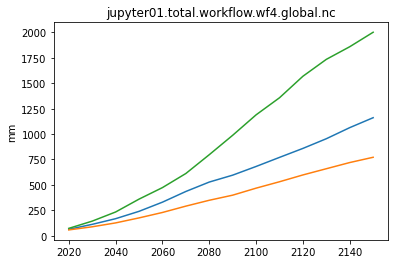

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(ds.years,ds.sea_level_change.quantile(.5,dim='samples'))
plt.plot(ds.years,ds.sea_level_change.quantile(.17,dim='samples'))
plt.plot(ds.years,ds.sea_level_change.quantile(.83,dim='samples'))

plt.ylabel('mm')
plt.title(datafile)

In [7]:
dq=ds.sea_level_change.quantile([.17,.5,.83],dim='samples')
u=dq[:,:,0]
print(u.to_pandas())

years          2020        2030        2040        2050        2060  \
quantile                                                              
0.17      57.239272   88.004608  126.215576  175.403595  228.839211   
0.50      63.167543  112.006096  167.744530  240.017227  330.263947   
0.83      72.537868  143.656922  233.604783  360.113478  473.505244   

years           2070        2080        2090         2100         2110  \
quantile                                                                 
0.17      291.248660  348.928113  399.083181   468.044440   531.074147   
0.50      435.463089  528.030609  596.008484   681.430084   770.745422   
0.83      612.229022  797.251412  988.169632  1189.241073  1357.275703   

years            2120         2130         2140         2150  
quantile                                                      
0.17       598.057414   659.178299   719.986141   771.830245  
0.50       859.066895   954.308533  1063.399475  1161.114258  
0.83      1568.879995